<a href="https://colab.research.google.com/github/KarimSalem9000/LeetCode_Answers/blob/main/indep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
img_path = '/content/drive/MyDrive/wound_photos/Copy of 1690989680036879.jpg'  # Change '\' to '/'

img = cv2.imread(img_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                         

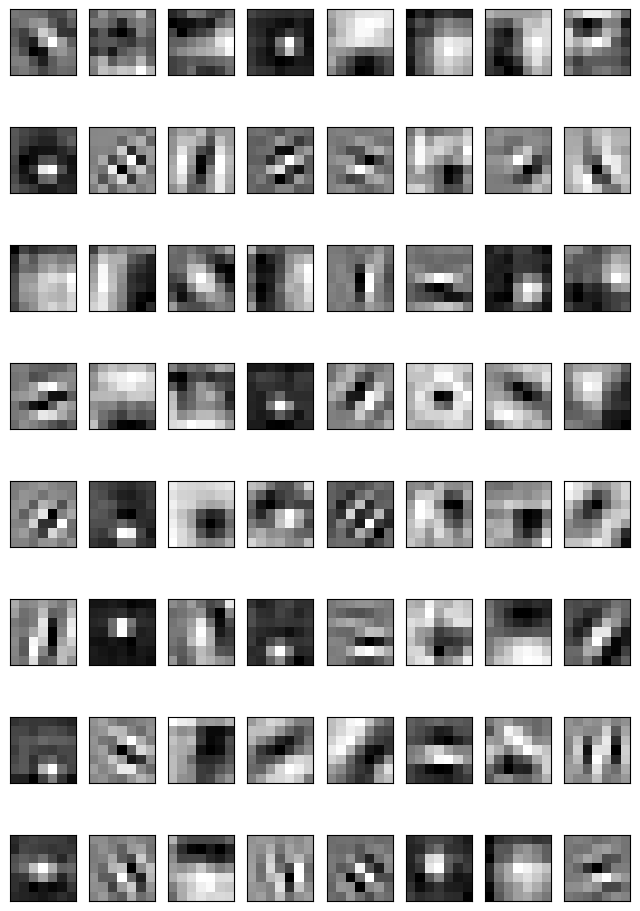

1/1 [==============================] - 0s 347ms/step
Input shape to the model:  (1, 224, 224, 3)


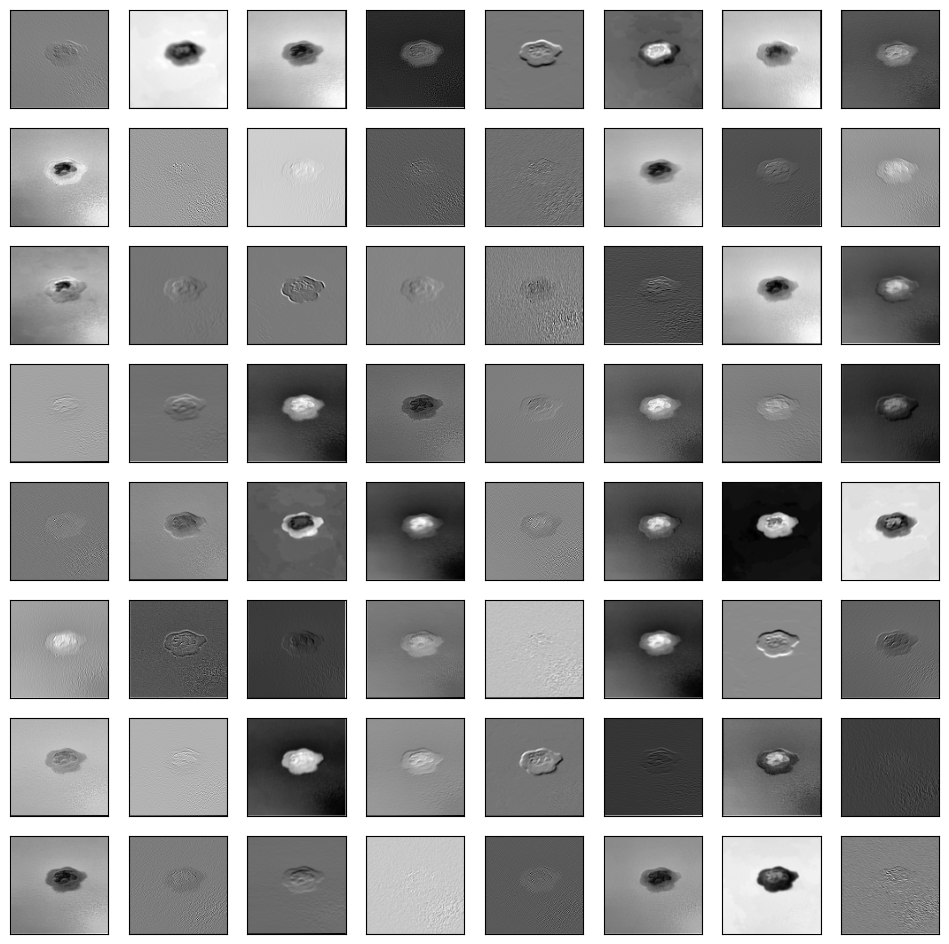

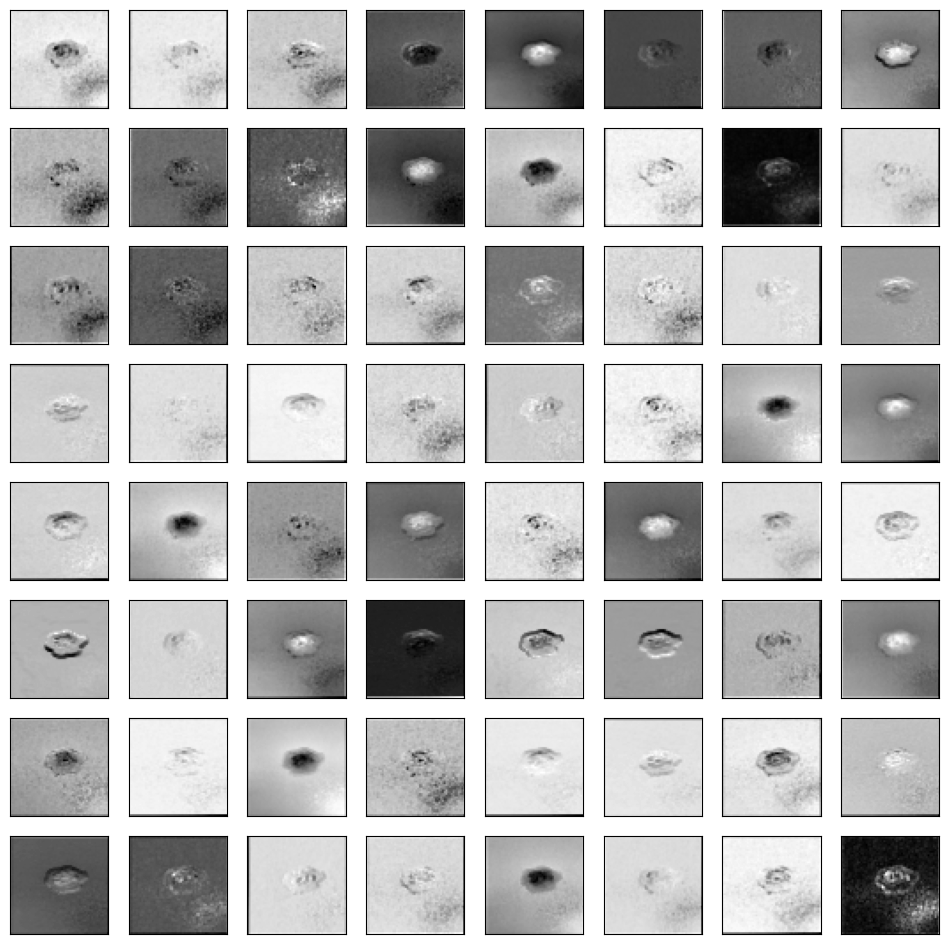

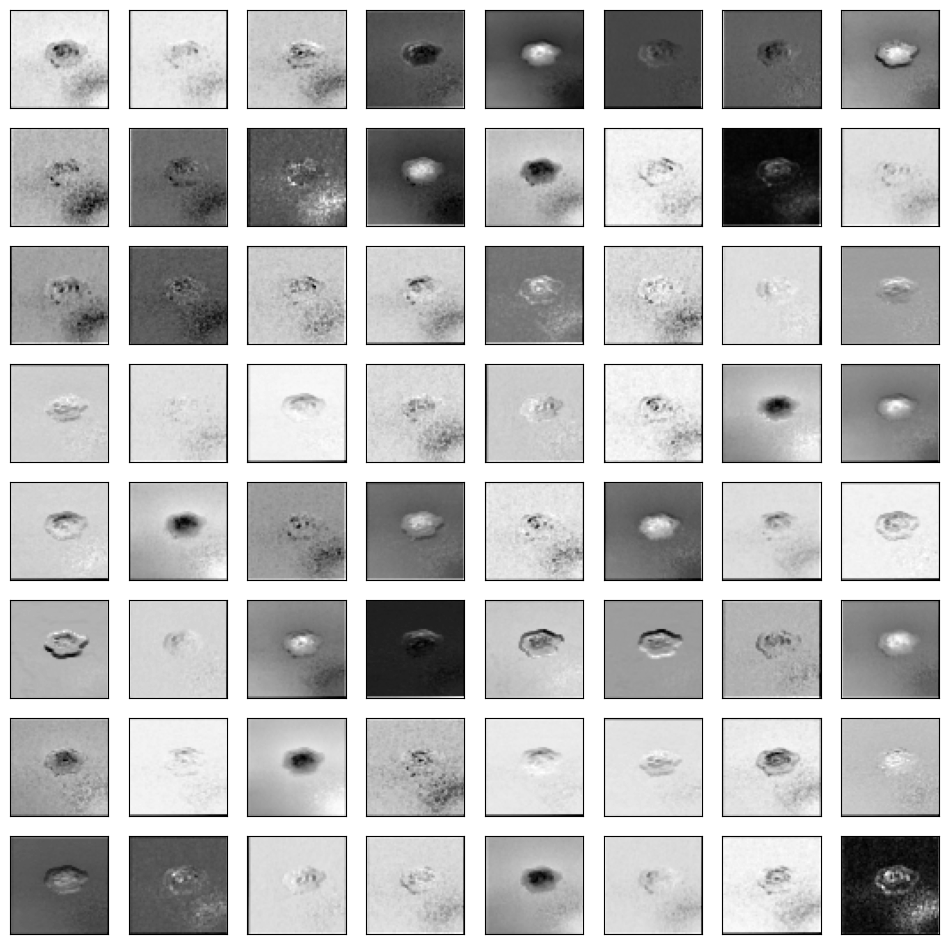

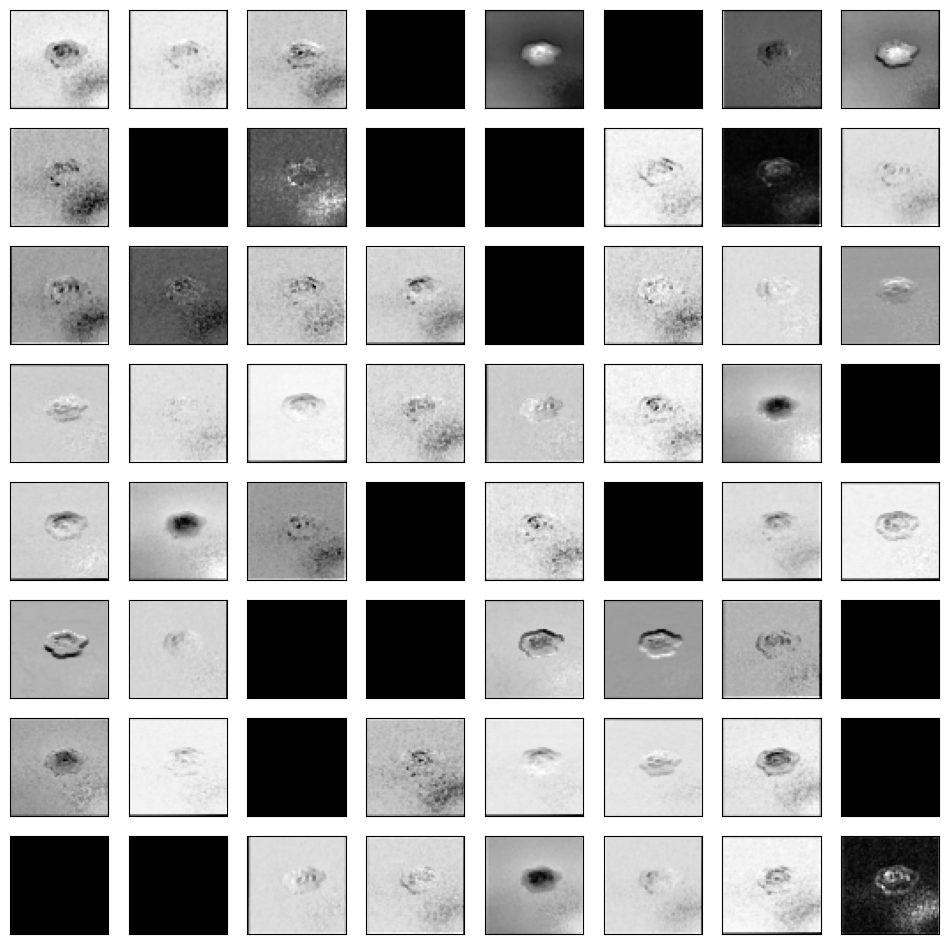

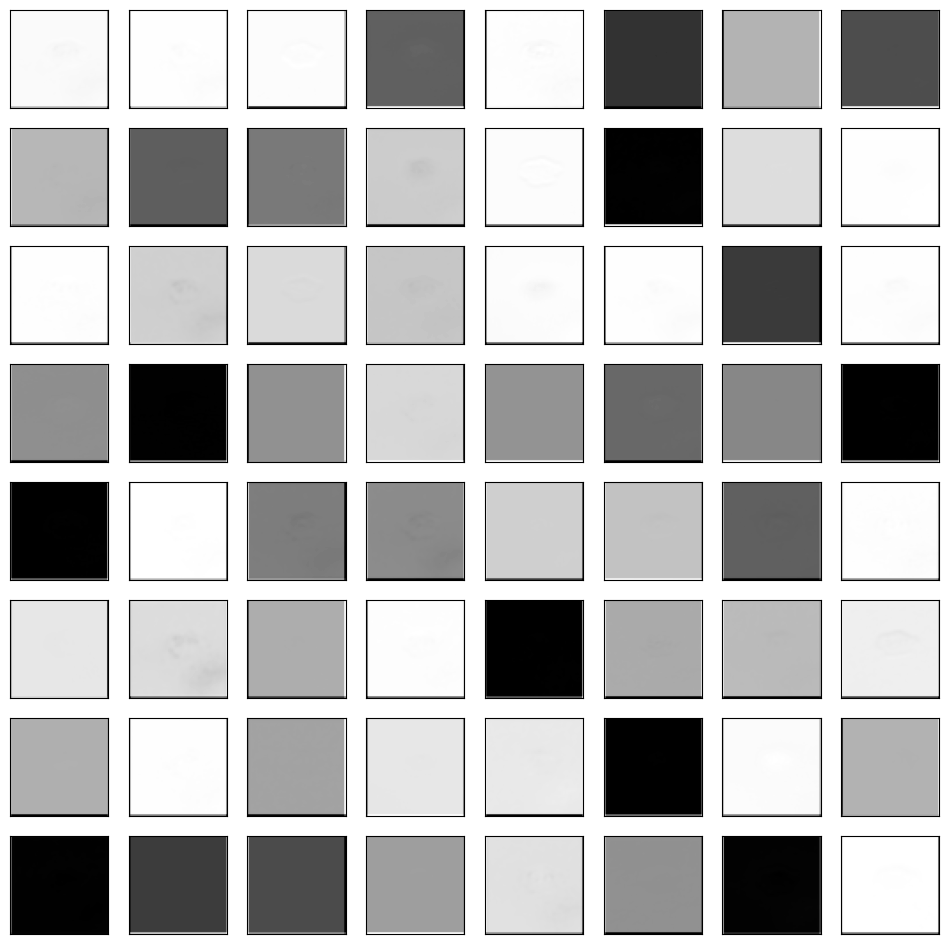

In [ ]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout, Conv2D
import numpy as np
import matplotlib.pyplot as plt

resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

x = Flatten()(resnet_model.output)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(9, activation='softmax')(x)

model = Model(inputs=resnet_model.input, outputs=predictions)
model.compile(optimizer='sgd', loss='categorical_crossentropy')

print(model.summary())
from numpy.lib.function_base import select
def get_conv_layers(model):
    conv_layers = []
    for layer in model.layers:
        if isinstance(layer, Conv2D):
            conv_layers.append(layer)
    return conv_layers

conv_layers = get_conv_layers(model)
print(conv_layers)

conv_layer_index = [2,7,8,9,10]
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())
select_conv_layer = conv_layers[0]
filters, biases = select_conv_layer.get_weights()
print(select_conv_layer.name, filters.shape)
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()
import cv2
import numpy as np
from keras.datasets import cifar10
import tensorflow as tf

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Exclude the "ship" class (class 8) from the dataset
exclude_class = 8
train_mask = np.squeeze(train_labels) != exclude_class
test_mask = np.squeeze(test_labels) != exclude_class
train_images = train_images[train_mask]
train_labels = train_labels[train_mask]
test_images = test_images[test_mask]
test_labels = test_labels[test_mask]

# Load the image from the file path
import cv2
image_path = "/content/drive/MyDrive/wound_photos/Copy of 1690989680036879.jpg"  # Ensure the path is correct
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    print("Image not loaded. Please check the file path.")
else:
    # Resize the image to the desired shape (224, 224)
    img = cv2.resize(img, (224, 224))

    # Convert image to the right type and scale (if needed)
    img = img.astype('float32') / 255.0

    # Expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)

    # Assuming 'model_short' is already defined and loaded elsewhere in your code:
    # Generate feature output by predicting on the input image
    feature_output = model_short.predict(img)
    print("Input shape to the model: ", img.shape)

columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

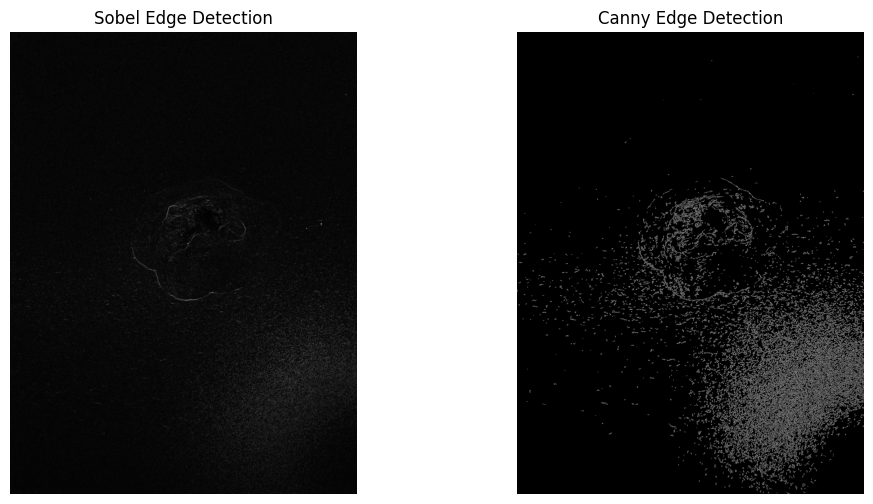

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_sobel(img, ksize=3):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Sobel operator in X direction
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=ksize)
    # Apply Sobel operator in Y direction
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=ksize)
    # Compute the magnitude of the gradient
    sobel_mag = np.sqrt(sobelx**2 + sobely**2)
    return sobel_mag

def apply_canny(img, threshold1=50, threshold2=150):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detector
    edges = cv2.Canny(gray, threshold1, threshold2)
    return edges

# Load the image
import cv2
img_path = '/content/drive/MyDrive/wound_photos/Copy of 1690989680036879.jpg'  # Change '\' to '/'

img = cv2.imread(img_path)

# Check if the image was loaded correctly
if img is None:
    print("Image not loaded. Please check the file path.")
else:
    # Apply Sobel Operator
    sobel_output = apply_sobel(img)
    # Apply Canny Edge Detector
    canny_output = apply_canny(img)

    # Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(sobel_output, cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(canny_output, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    plt.show()
